# Python pentru ML

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/2nd Edition -- 2023/Workshops")

## NumPy

Numpy vine de la "numerical python". Este un modul Python folosit pentru calculul optimizat și paralelizarea operațiilor între numpy array-uri. Librăria este scrisă în C pentru a fi mai rapidă. O moștenire a limbajului C o reprezintă chiar tipurile de date pe care le poate avea un numpy array

In [ ]:
import numpy as np

Putem inițializa un numpy array folosind o listă din Python:

In [ ]:
a = np.array([1, 2, 3], dtype='int')

print(a)
print(type(a))
print(a.dtype)
print(a.shape)
print(a[0])

[1 2 3]
<class 'numpy.ndarray'>
int64
(3,)
1


Sau putem folosi funcții predefinite. _np.zeros()_ creează un vector conținând numai 0:

In [ ]:
zero_array = np.zeros((3, 2))
print(zero_array)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


_np.full()_ creează un vector constant:

In [ ]:
constant_array = np.full((2, 2), 8)
print(constant_array)

[[8 8]
 [8 8]]


_np.random()_ creează un vector cu valori aleatoare uniform distribuite între [0, 1):

In [ ]:
random_array = np.random.random((1, 2))
print(random_array)

[[0.92506287 0.99602784]]


_np.linspace()_ creează un vector de elemente egal depărtate din intervalul [0, 1], în care primul element e 0 și ultimul element e 1:

In [ ]:
eqdist_array = np.linspace(0, 1, 100)
print(eqdist_array)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

## Filtre

Uneori este util să putem filtra o submulțime a unui array. Putem face acest lucru folosind slice-uri pe liste, prin liste de indici sau chiar prin condiții dependente de valori:

In [ ]:
array_to_slice = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
slice = array_to_slice[:, 0:3]
print(slice)

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]


In [ ]:
slice[0][0] = 20

print(slice)
print()
print(array_to_slice)

[[20  2  3]
 [ 5  6  7]
 [ 9 10 11]]

[[20  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


**Atenție!** Modificarea listei _slice_ duce automat la modificarea listei *array_to_slice*. Pentru a evita acest lucru submulțimea poate fi copiată:

In [ ]:
slice_copy = np.copy(array_to_slice[:, 0:3])
slice_copy[0][0] = 100

print(slice_copy, '\n\n', array_to_slice)

[[100   2   3]
 [  5   6   7]
 [  9  10  11]] 

 [[20  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Pentru a selecta toate elementele mai mari ca 10 dintr-o listă oarecare:

In [ ]:
bool_comp = [i for line in array_to_slice for i in line if i > 10]
bool_comp

[20, 11, 12]

Pentru a selecta toate elementele mai mari ca 10 dintr-un numpy array:

In [ ]:
bool_idx = (array_to_slice > 10)
print(bool_idx)

[[ True False False False]
 [False False False False]
 [False False  True  True]]


Rezultatul este o matrice de aceeași dimensiune ca *array_to_slice* în care fiecare element constă într-o valoare bool astfel:
- True, dacă elementul corespunzator din *array_to_slice* > 10
- False, dacă elementul corespunzator din *array_to_slice* <= 10

Acum ne putem folosi direct de matricea de boolene formată pentru a identifica numerele mai mari ca 10:

In [ ]:
print(array_to_slice[bool_idx])

[20 11 12]


Acest lucru este echivalent cu a scrie:

In [ ]:
print(array_to_slice[array_to_slice > 10])

[20 11 12]


## Operații

Operațiile matematice de bază sunt disponibile atât ca funcții numpy cât și ca operatori. Ele sunt aplicate element cu element:

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
y = np.array([[5, 6], [7, 8]], dtype=np.float64)

Suma element cu element:

In [ ]:
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


Înmulțirea:

In [ ]:
print(np.matmul(x, y))

[[19. 22.]
 [43. 50.]]


Transpusa unei matrice:

In [ ]:
print(x.T)

[[1. 3.]
 [2. 4.]]


Inversa:

In [ ]:
print(np.linalg.inv(x))

[[-2.   1. ]
 [ 1.5 -0.5]]


Până acum am făcut operații pe matrice complete, dar Numpy dispune și de funcții care ne permit să realizăm operații pe o anumită dimensiune.

Suma tuturor elementelor:

In [ ]:
print(np.sum(x))

10.0


Suma pe coloane:

In [ ]:
print(np.sum(x, axis=0))

[4. 6.]


Suma pe linii:

In [ ]:
print(np.sum(x, axis=1))

[3. 7.]


Putem specifica și mai multe axe pe care să facem operațiile:

In [ ]:
print(np.sum(x, axis=(0, 1)))

10.0


Evident, suma nu este unica operație la care avem acces. Printre altele, mai avem media:

In [ ]:
print(np.mean(x, axis=0))

[2. 3.]


și indexul elementului maxim:

In [ ]:
print(np.argmax(x, axis=1))

[1 1]


## Pandas

Pandas vine de la "Python Data Analysis Library". Este un modul folosit pentru lucrul cu date tabulare. Obiectul de lucru de data aceasta nu mai este numpy array-ul, care poate avea până la n dimensiuni, ci dataframe-ul. Dataframe-ul este practic un tabel cu mai multe rânduri și coloane. Vom considera fiecare coloană ca fiind un feature, o trăsătură a datelor cu care lucrăm, iar fiecare rând/linie din tabel va fi denumit record sau datapoint.

Asemănarea cu Numpy se păstrează în ceea ce privește tipurile pe care le pot avea elementele din celulele din tabel.

In [ ]:
import pandas as pd

filepath = "./beer_profile_and_ratings.csv"

Citirea unui dataframe:

In [ ]:
df = pd.read_csv(filepath)

Salvare unui dataframe:


In [ ]:
df.to_csv("./my_dataframe.csv")

Putem vedea primele N linii dintr-un dataframe. Valoarea default pentru numărul de linii afișate este 5:

In [ ]:
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


Similar, putem vedea și ultimele N linii dintr-un dataframe. Valoarea default pentru numărul de linii afișate este tot 5:

In [ ]:
df.tail()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87
3196,Frosted Frog Christmas Ale - Barrel-Aged,Winter Warmer,Hoppin' Frog Brewery,Hoppin' Frog Brewery Barrel Aged Frosted Frog ...,Notes:The essence of Christmas is captured in ...,8.6,35,50,8,50,...,33,16,148,69,3.888889,3.694444,3.833333,3.555556,3.527778,18


## Operații pe coloane

Observăm că în dataframe-urile de mai sus nu au fost afișate toate coloanele. Putem accesa lista lor folosind _columns_:

In [ ]:
df.columns

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

Probabil nu ne interesează toate aceste coloane în analiza noastră. Hai să renunțăm la o parte dintre ele:

In [ ]:
df = df.drop(columns = ["ABV", "Min IBU", "Max IBU", "Name", "Brewery", "number_of_reviews"])
df.head(2)

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall
0,Altbier,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082
1,Altbier,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304


În aceeași temă, putem adăuga coloane noi în dataframe-ul nostru:

In [ ]:
df["mean_review"] = (df["review_aroma"] + df["review_appearance"] + df["review_palate"] + df["review_taste"]) / 4
df.head(2)

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review
0,Altbier,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",13,32,9,47,74,33,0,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,3.584004
1,Altbier,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",12,57,18,33,55,16,0,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,3.893451


Coloana "mean_review" a fost calculată direct ca o medie între alte coloane. Dar dacă vrem să facem mai multe operații pe inputul unei coloane?

In [ ]:
df["desc_length"] = df["Description"].apply(lambda description: len(description.split()))
df.head(1)

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review,desc_length
0,Altbier,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",13,32,9,47,74,33,0,...,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,3.584004,24


Indexarea unei coloane din df:

In [ ]:
df["Style"]

0             Altbier
1             Altbier
2             Altbier
3             Altbier
4             Altbier
            ...      
3192    Winter Warmer
3193    Winter Warmer
3194    Winter Warmer
3195    Winter Warmer
3196    Winter Warmer
Name: Style, Length: 3197, dtype: object

Putem vedea câte stiluri diferite de bere există în setul de date folosind funcția _unique()_:

In [ ]:
df["Style"].unique()

array(['Altbier', 'Barleywine - American', 'Barleywine - English',
       'Bitter - English Extra Special / Strong Bitter (ESB)',
       'Bitter - English', 'Bière de Champagne / Bière Brut',
       'Blonde Ale - American', 'Blonde Ale - Belgian',
       'Bock - Doppelbock', 'Bock - Eisbock', 'Bock - Maibock',
       'Bock - Traditional', 'Bock - Weizenbock', 'Braggot', 'Brett Beer',
       'Brown Ale - American', 'Brown Ale - Belgian Dark',
       'Brown Ale - English', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel',
       'Farmhouse Ale - Bière de Garde', 'Farmhouse Ale - Sahti',
       'Farmhouse Ale - Saison', 'Fruit and Field Beer',
       'Gruit / Ancient Herbed Ale', 'Happoshu', 'Herb and Spice Beer',
       'IPA - American', 'IPA - Belgian',
       'IPA - Black / Cascadian Dark Ale', 'IPA - English',
       'IPA - Imperial', 'IPA - New England', 'Kvass', 'Kölsch',
       'Lager - Adjunct', 'Lager - American Amber / Red',
       'Lager - American',

Ce alte variante avem?

In [ ]:
set(df["Style"])

{'Altbier',
 'Barleywine - American',
 'Barleywine - English',
 'Bitter - English',
 'Bitter - English Extra Special / Strong Bitter (ESB)',
 'Bière de Champagne / Bière Brut',
 'Blonde Ale - American',
 'Blonde Ale - Belgian',
 'Bock - Doppelbock',
 'Bock - Eisbock',
 'Bock - Maibock',
 'Bock - Traditional',
 'Bock - Weizenbock',
 'Braggot',
 'Brett Beer',
 'Brown Ale - American',
 'Brown Ale - Belgian Dark',
 'Brown Ale - English',
 'California Common / Steam Beer',
 'Chile Beer',
 'Cream Ale',
 'Dubbel',
 'Farmhouse Ale - Bière de Garde',
 'Farmhouse Ale - Sahti',
 'Farmhouse Ale - Saison',
 'Fruit and Field Beer',
 'Gruit / Ancient Herbed Ale',
 'Happoshu',
 'Herb and Spice Beer',
 'IPA - American',
 'IPA - Belgian',
 'IPA - Black / Cascadian Dark Ale',
 'IPA - English',
 'IPA - Imperial',
 'IPA - New England',
 'Kvass',
 'Kölsch',
 'Lager - Adjunct',
 'Lager - American',
 'Lager - American Amber / Red',
 'Lager - European / Dortmunder Export',
 'Lager - European Dark',
 'Lager - E

## Operații pe linii

Putem accesa linii custom din dataframe folosind funcția _take()_:

In [ ]:
df.take([0, 2, 1000])

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review,desc_length
0,Altbier,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",13,32,9,47,74,33,0,...,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,3.584004,24
2,Altbier,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,14,37,6,42,43,11,0,...,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,3.577255,64
1000,Kölsch,Stoudts Brewing Co. Karnival Kolsch,Notes:,39,38,10,41,26,35,1,...,69,12,69,3.693966,3.896552,3.905172,3.866379,4.081897,3.840517,1


Sau funcțiile _loc_ și _iloc_:

In [ ]:
df.iloc[[0, 1]]

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review,desc_length
0,Altbier,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",13,32,9,47,74,33,0,...,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,3.584004,24
1,Altbier,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",12,57,18,33,55,16,0,...,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,3.893451,113


Spre deosebire de _take_, _iloc_ poate returna lista informațiilor pentru un singur element:

In [ ]:
df.iloc[1]

Style                                                          Altbier
Beer Name (Full)                     Long Trail Brewing Co. Double Bag
Description          Notes:This malty, full-bodied double alt is al...
Astringency                                                         12
Body                                                                57
Alcohol                                                             18
Bitter                                                              33
Sweet                                                               55
Sour                                                                16
Salty                                                                0
Fruits                                                              24
Hoppy                                                               35
Spices                                                              12
Malty                                                               84
review

Cum accesăm descrierea berii de pe rândul 3?

In [ ]:
df.iloc[3][2]

'Notes:'

In [ ]:
df.iloc[3]["Description"]

'Notes:'

In [ ]:
df.iloc[3, 2]

'Notes:'

In [ ]:
df.loc[3]

Style                                                          Altbier
Beer Name (Full)     Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...
Description                                                     Notes:
Astringency                                                         13
Body                                                                55
Alcohol                                                             31
Bitter                                                              47
Sweet                                                              101
Sour                                                                18
Salty                                                                1
Fruits                                                              49
Hoppy                                                               40
Spices                                                              16
Malty                                                              119
review

Cum accesăm numele datapointurilor din intervalul 2-5?

In [ ]:
df[2:6]["Beer Name (Full)"]

2                Long Trail Brewing Co. Long Trail Ale
3    Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...
4    Ninkasi Brewing Company Sleigh'r Dark Doüble A...
5    Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...
Name: Beer Name (Full), dtype: object

## Alte funcții

Putem realiza un summary cu mai multe informații despre dataframe-ul dat:

In [ ]:
df.describe()

,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


Filtrarea funcționează ca la numpy:

In [ ]:
df[df["Spices"] == 7]

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review,desc_length
16,Altbier,Rising Tide Brewing Company Ishmael,Notes:Ishmael is our richly-flavored American ...,17,41,1,55,43,18,1,...,80,7,103,3.528571,3.914286,3.814286,3.914286,3.900000,3.792857,41
23,Altbier,Mission Brewery Mission Amber,Notes:,24,36,9,59,55,20,2,...,80,7,132,3.588235,3.735294,3.411765,3.588235,3.470588,3.580882,1
108,Bitter - English Extra Special / Strong Bitter...,Greene King / Morland Brewery Abbot Ale,Notes:Hailed by the late beer writer Michael J...,9,42,5,30,63,16,3,...,51,7,92,3.500000,3.873512,3.712798,3.633929,3.764881,3.680060,65
113,Bitter - English Extra Special / Strong Bitter...,Foster's Group Limited Foster's Premium Ale,Notes:,21,43,15,45,53,17,0,...,73,7,95,2.701613,3.387097,3.044355,2.919355,3.104839,3.013105,1
118,Bitter - English Extra Special / Strong Bitter...,Short's Brewing Company Short's Autumn Ale,Notes:A malty amber ale over toned with slight...,17,41,15,66,68,33,0,...,94,7,107,3.520270,3.641892,3.547297,3.486486,3.540541,3.548986,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,Wheat Beer - American Pale,Tommyknocker Brewery Jack Whacker Wheat Ale,Notes:An American-style wheat ale brewed with ...,12,32,9,13,30,91,0,...,25,7,64,3.302326,3.402326,3.355814,3.381395,3.527907,3.360465,46
2972,Wheat Beer - American Pale,Peak Organic Brewing Company Peak Organic Summ...,Notes:A traditional summer wheat beer marries ...,18,34,8,60,13,59,1,...,77,7,67,3.782051,3.782051,3.858974,3.846154,3.974359,3.817308,27
3078,Wheat Beer - Kristallweizen,Kulmbacher Brauerei AG Kapuziner Kristall-Weizen,Notes:,3,8,1,4,5,5,0,...,5,7,14,3.142857,3.285714,3.214286,3.214286,3.428571,3.214286,1
3095,Wheat Beer - Wheatwine,Baird Brewing Company / Fishmarket Taproom Wes...,Notes:Brewer's Notes: Wheat Wine is a beer sty...,18,45,33,37,96,63,0,...,32,7,70,3.791667,3.750000,3.791667,3.666667,3.791667,3.750000,225


In [ ]:
df[df["Spices"] > 100]

,Style,Beer Name (Full),Description,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,...,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,mean_review,desc_length
344,Bock - Traditional,Boston Beer Company (Samuel Adams) Samuel Adam...,Notes:,9,127,32,30,129,16,0,...,14,103,130,3.900000,3.900000,4.000000,4.300000,4.200000,4.025000,1
406,Braggot,The People's Pint Slippery Slope,"Notes:A special blend of 1/2 cider, 1/4 malt a...",27,32,32,14,141,114,0,...,26,107,70,3.743590,3.628205,3.589744,3.769231,3.512821,3.682692,16
407,Braggot,Dansk Mjød A/S Old Danish Braggot,Notes:,6,70,37,9,169,18,0,...,14,120,119,4.027778,3.750000,3.805556,3.833333,3.638889,3.854167,1
536,Chile Beer,Rogue Ales Chipotle Ale,Notes:Label of 22 oz bottle:8 Ingredients: Har...,13,30,25,32,21,7,0,...,40,170,47,3.557549,3.732436,3.629297,3.629297,3.421525,3.637145,86
539,Chile Beer,Twisted Pine Brewing Company Billy's Chilies B...,Notes:Our chili beer is made with five differe...,13,22,37,11,23,15,0,...,9,184,22,3.604651,3.325581,3.325581,3.383721,3.209302,3.409883,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,Winter Warmer,Sly Fox Brewing Company Christmas Ale,"Notes:This malty, full-bodied red ale is made ...",10,51,10,14,51,12,1,...,14,123,51,4.000000,3.928571,3.821429,4.071429,4.142857,3.955357,49
3182,Winter Warmer,Hoppin' Frog Brewery Frosted Frog Christmas Ale,Notes:The essence of Christmas is captured in ...,6,40,37,23,64,14,0,...,24,124,66,3.957944,3.733645,3.593458,3.565421,3.429907,3.712617,35
3183,Winter Warmer,Fat Heads Brewery & Saloon Christmas Ale,"Notes:Once upon a frozen evening way up north,...",12,45,19,10,62,5,0,...,30,123,70,4.000000,3.875000,4.083333,4.208333,4.125000,4.041666,92
3193,Winter Warmer,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,15,31,23,16,54,43,0,...,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,3.812500,38


Un dataframe poate fi construit și pornind de la un dicționar:

In [ ]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}

df1 = pd.DataFrame.from_dict(data)
df1

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


Dacă avem 2 dataframe-uri, le putem concatena la nivel de linii:

In [ ]:
df2 = df1.copy()

df_concat = pd.concat([df1, df2], axis=0)
df_concat

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d
0,3,a
1,2,b
2,1,c
3,0,d


Sau la nivel de coloane:

In [ ]:
df_concat = pd.concat([df1, df2], axis=1)
df_concat

,col_1,col_2,col_1,col_2
0,3,a,3,a
1,2,b,2,b
2,1,c,1,c
3,0,d,0,d


## MatPlotLib

Matplotlib vine de la Mathematical Plotting Library. Este folosit pentru a realiza analiza exploratorie și vizualizarea datelor.

De ce este important să analizezi și să vizualizezi datele?

Un exemplu foarte bun care surprinde această nevoie este "Cvartetul lui Anscome"("Anscombe's quartet"). Acest exemplu cuprinde 4 dataset-uri care sunt aproape identice din punct de vedere statistic. Au aproximativ aceeași medie pe Ox și Oy, aceeași deviație standard pe ambele axe, aceeași corelație între valorile absciselor și ale ordonatelor. Implicit, dacă ar fi să aplicăm "în orb" un model liniar, așa cum este regresia liniară în care nu vom intra în detalii. Dacă încercăm să facem o vizualizare a acestor 4 dataset-uri vom obține niște concluzii cel puțin interesante. Primul dataset pare să urmeze o relație liniară cu puțin noise gaussian pe alocuri. Al doilea dataset pe de alta parte surprinde o relație neliniară între puncte care ar putea fi cel mai bine modelată de o regresie polinomială și nu de această regresie liniară. Al treilea este tot un dataset cu o relație liniară existentă între caracteristicile lui, totuși prezentând un outlier important. Ultimul dataset curpinde și el un outlier mult mai pregnant, dar fiindcă aproape toate punctele au aceeași valoare pe Ox, deci nu putem trage o concluzie vizavi de corelația lor. În esență, cea mai importantă idee este că datele pot să difere foarte mult, iar uneori instrumentele pe care le oferă statistica nu sunt suficiente pentru a explica acele dataseturi pe de o parte, iar pe de alta uneori vizualizarea datelor ne poate furniza insight-uri legat de ce modele am putea folosi pentru aceste date și ne pot ajuta să gasim noi feature-uri.

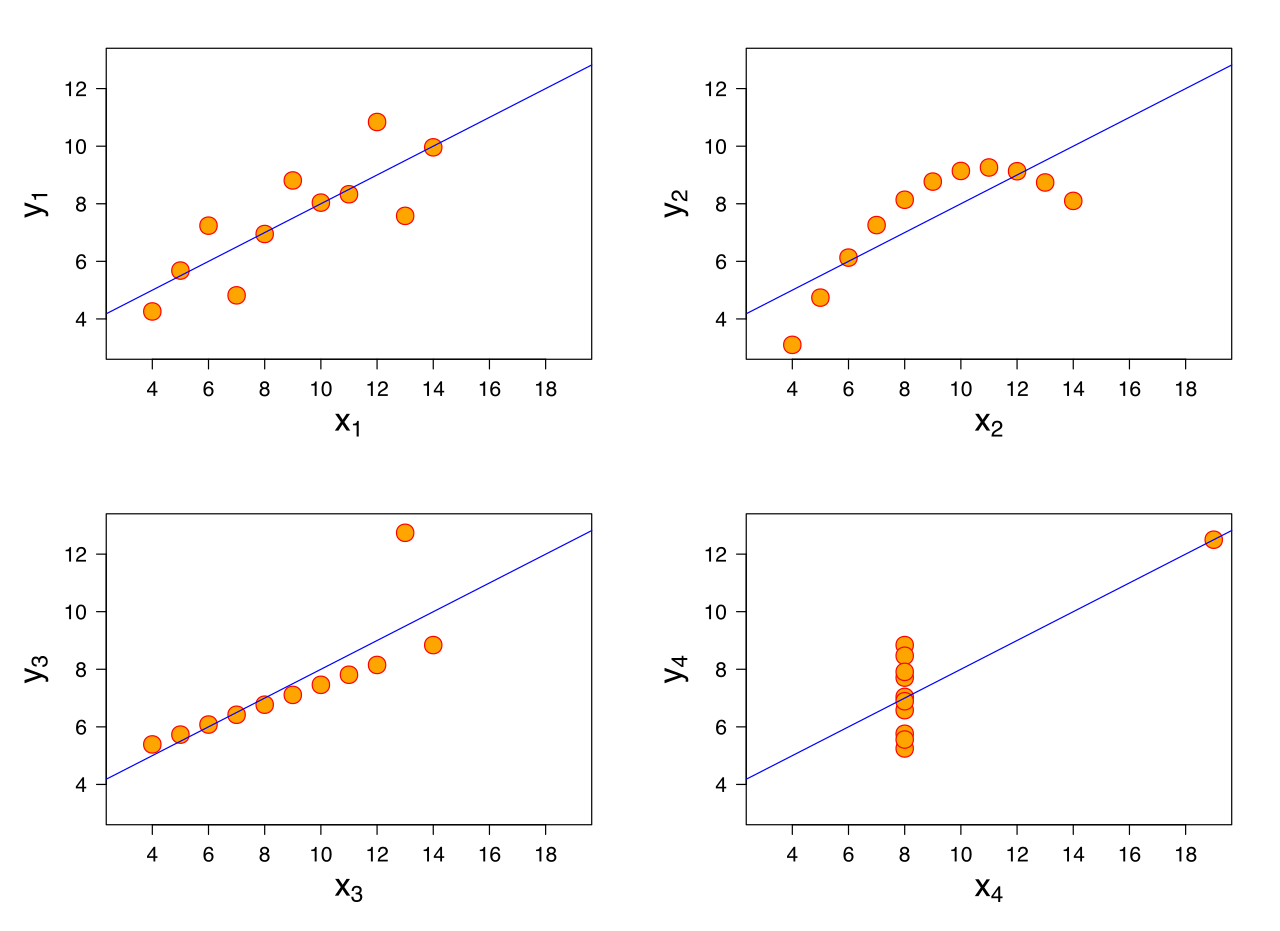

Cele mai folosite funcții din matplotlib se găsesc în submodulul pyplot, iar alias-ul de import folosit cel mai des este plt.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Tipuri de plot-uri

Liniar:

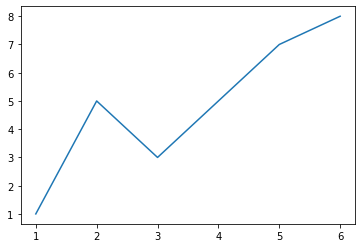

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 5, 3, 5, 7, 8])

plt.plot(x, y)
plt.show()

Scattered:

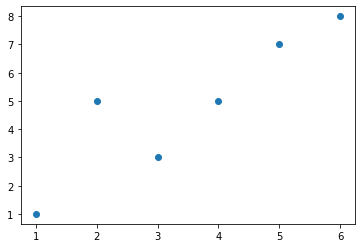

In [ ]:
x_values = np.array([5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6])
y_values = np.array([99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86])


plt.scatter(x, y)
plt.show()

Histogramă:

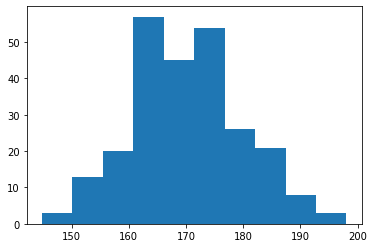

In [ ]:
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()

Barchart:

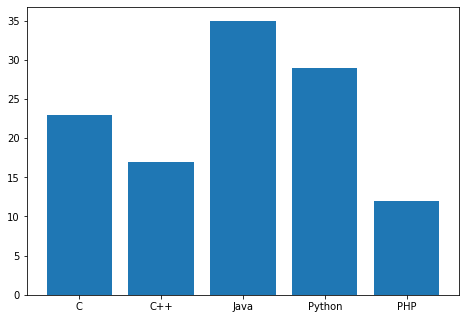

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23, 17, 35, 29, 12]
ax.bar(langs, students)
plt.show()

## WorldCloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


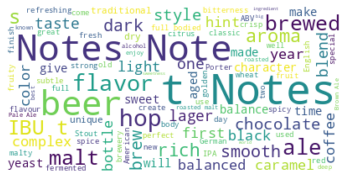

In [ ]:
from wordcloud import WordCloud

text = " ".join(df["Description"].to_list())

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()